# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [64]:
# Your code here.
import pandas as pd
student_data = pd.DataFrame({"age":[17,51,27,21,36,48,19,26,54,30], "tardies":[10,1,5,9,4,2,9,6,0,3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [9]:
# Your code here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

,age,tardies
0,17,10
6,19,9
3,21,9
7,26,6
2,27,5
9,30,3
4,36,4
5,48,2
1,51,1
8,54,0


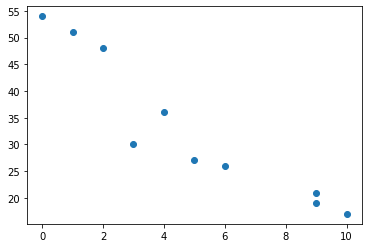

In [69]:
student_data = student_data.sort_values(by=["age"])
plt.scatter(student_data["tardies"], student_data["age"])

plt.show
student_data


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

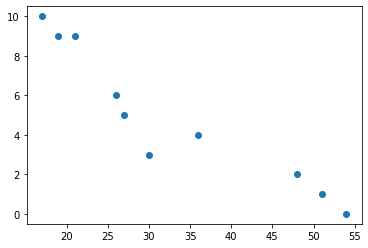

In [67]:
x= student_data["age"].tolist()
y = student_data["tardies"].tolist()

plt.scatter(x, y)

plt.show()


c:\users\picav\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

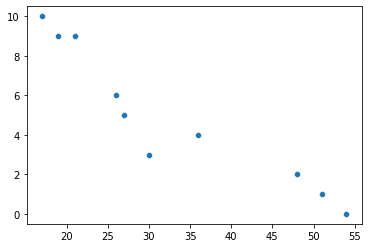

In [68]:
sns.scatterplot(x,y)


In [ ]:
# Your response here. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [71]:
# Your response here.
#correlation:
student_data = pd.DataFrame({"age":[17,51,27,21,36,48,19,26,54,30], "tardies":[10,1,5,9,4,2,9,6,0,3]})

print(student_data.corr())
#covariance:
np.cov(student_data["age"],student_data["tardies"])

              age   tardies
age      1.000000 -0.939163
tardies -0.939163  1.000000


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [ ]:
#comments. in correlations we see a  quasi linear negative correlation of 0.93
# in covariance we see a strong age variance and a smaller tardies variance. but to interpret covariance we would need a 
#normalized version of it. however a covariance of -45 with those values(max 54) implies a strong correlation btw age and tardies

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [74]:
# Your response here.
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#i will use linear regression as there are only 2 variables and they are very strongly  linearly correlated
x = student_data['age']
y = student_data['tardies']
results = stats.linregress(x,y)
regression_line = results.intercept + results.slope*x

Plot your regression model on your scatter plot.

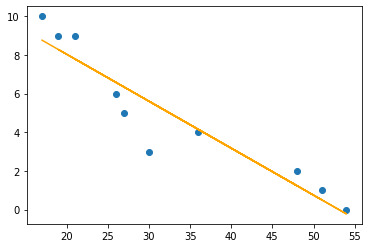

In [75]:
# Your code here.
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [76]:
# Your response here. 
results.rvalue**2
#0.88 for R2 is a good result. ages and tardies are strongly correlated(negatively as slope is negative)

0.8820265558250112

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [83]:
# Import any libraries you may need & the data
vehicles= pd.read_csv("./vehicles.csv")
import statsmodels.api as sm
vehicle_used = vehicles[["Year","Cylinders","Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [84]:
# Your response here. 
vehicle_used.corr()
#strong correlation between consumption and CO2 with fuel Barrels/year and MPG(negative obviously). good correlation with cylinders. all make sense

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [87]:
# Your response here. multilinear regression
X = vehicle_used[['Fuel Barrels/Year','Combined MPG']]
y = vehicle_used['CO2 Emission Grams/Mile']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          1.086e+07
Date:                     Sat, 07 Nov 2020   Prob (F-statistic):                        0.00
Time:                             20:03:21   Log-Likelihood:                     -1.5858e+05
No. Observations:                    35952   AIC:                                  3.172e+05
Df Residuals:                        35950   BIC:                                  3.172e+05
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.8293      0.012   2174.512      0.000      26.805      26.854
Combined MPG          0.1205      0.011     11.057      0.000       0.099       0.142
==============================================================================
Omnibus:                    89437.344   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1016588519.823
Skew:                          27.379   Prob(JB):                         0.00
Kurtosis:                     824.968   Cond. No.                         4.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R** is really good close to 1, so the model with those 2 variables  will nearly perfectly predict the co2 emissions. 
#durbin watson <2 indicates positive autocorrelation.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [103]:
# Your code here.
parties = pd.DataFrame({"invited": [1,3,4,6,8,9,11,14], "present": [1,2,4,4,5,7,8,13]})
parties

,invited,present
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

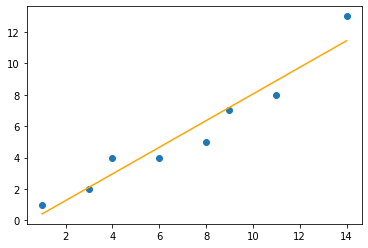

In [104]:
# Your code here.
x = parties['invited']
y = parties['present']
results = stats.linregress(x,y)
regression_line = results.intercept + results.slope*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


In [105]:
parties.corr()

,invited,present
invited,1.00000,0.96523
present,0.96523,1.00000


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [106]:
# Your response here. 
#seems like invited and attending are linearly correlated. so the more you invite the more poeple come

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

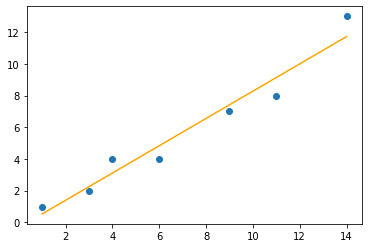

,invited,present
0,1,1
1,3,2
2,4,4
3,6,4
5,9,7
6,11,8
7,14,13


In [107]:
# Your response here. 
parties= parties.drop(parties.index[4])
x = parties['invited']
y = parties['present']
results = stats.linregress(x,y)
regression_line = results.intercept + results.slope*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()
parties

In [109]:
parties.corr()

,invited,present
invited,1.00000,0.97575
present,0.97575,1.00000


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#even more linear obviously as we drop outliers. correlation figures are even more close to 1